In [29]:
import json

with open("MMLU/results.json", "r") as file:
    mmlu: dict = json.load(file)
with open("GSM8k/results.json", "r") as file:
    gsm8k: dict = json.load(file)
with open("MuSR/results.json", "r") as file:
    musr: dict = json.load(file)
results = {
    "mmlu": mmlu,
    "GSM8k": gsm8k,
    "MuSR": musr
}
results

{'mmlu': {'scores': {'addition': 0.6734083463894032,
   'lexicon': 0.6826662868537245,
   'syntax': 0.6845890898732374,
   'our_baseline': 0.7028913260219342,
   'baseline': 0.7026776812419884},
  'model': 'meta-llama/Llama-3.1-8B-Instruct'},
 'GSM8k': {'scores': {'addition': 0.7733131159969674,
   'lexicon': 0.7035633055344959,
   'syntax': 0.7338893100833965,
   'naive': 0.7740712661106899,
   'baseline': 0.7816527672479151,
   'our_baseline': 0.7884761182714177},
  'model': 'meta-llama/Llama-3.1-8B-Instruct'},
 'MuSR': {'scores': {'addition': 0.4069583,
   'lexicon': 0.38978125,
   'syntax': 0.39117708333,
   'naive': 0.409625,
   'baseline': 0,
   'our_baseline': 0.40282291666},
  'model': 'meta-llama/Llama-3.1-8B-Instruct'}}

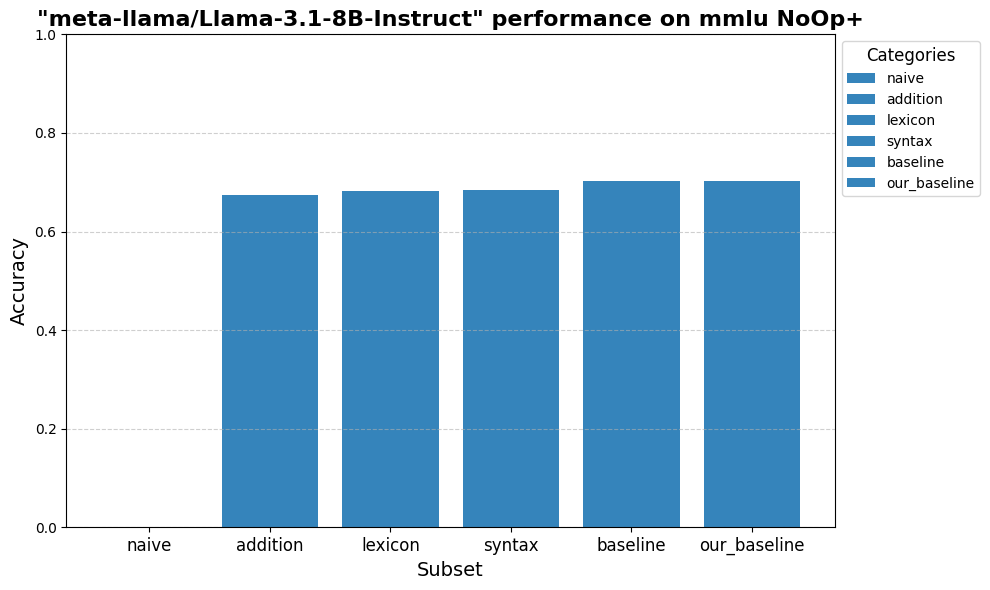

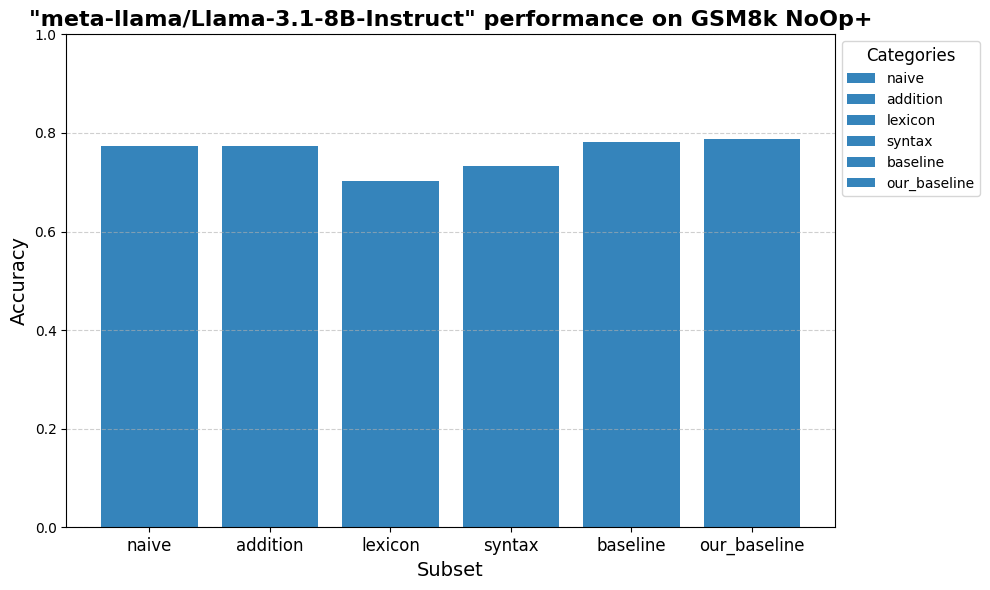

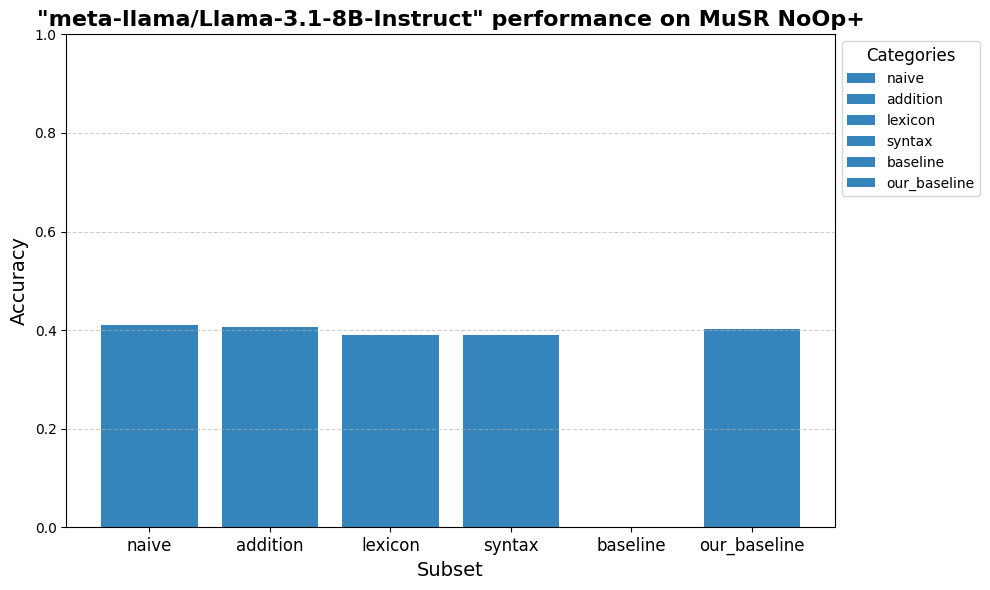

In [31]:
import numpy as np
import matplotlib.pyplot as plt

for key, result in results.items():
    # Data
    main_categories = ["naive", "addition", "lexicon", "syntax", "baseline", "our_baseline"]

    # Bar width settings
    bar_width = 0.8

    # Positions for main categories
    main_positions = np.arange(len(main_categories))

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))


    def get_score():
        scores = []
        for category in main_categories:
            if category in result["scores"].keys():
                scores.append(result["scores"][category])
            else:
                scores.append(0)
        return scores


    scores = get_score()
    # Define a color palette using colormaps
    ax.bar(main_positions, scores, bar_width, label=main_categories, alpha=0.9)

    # Customize x-axis
    ax.set_xticks(main_positions)
    ax.set_xticklabels(main_categories, fontsize=12)
    ax.set_xlabel("Subset", fontsize=14)

    # Customize y-axis
    ax.set_ylabel("Accuracy", fontsize=14)
    ax.set_ylim(0, 1.0)  # Add some padding

    # Add title
    ax.set_title(f'"{result["model"]}" performance on {key} NoOp+', fontsize=16, fontweight="bold")

    # Add gridlines
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Customize legend
    ax.legend(title="Categories", fontsize=10, title_fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

    # Tight layout for better spacing
    plt.tight_layout()

    plt.show()
